In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



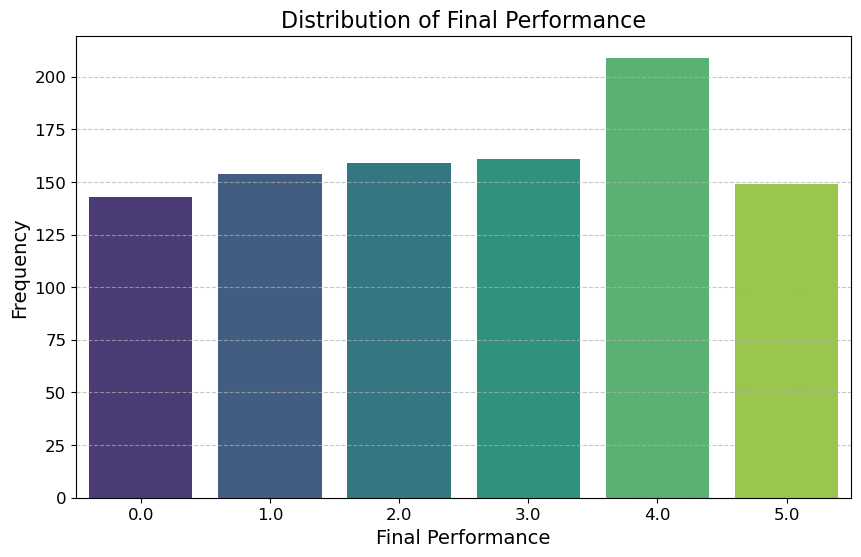

0.0    143
1.0    154
2.0    159
3.0    161
4.0    209
5.0    149
Name: final_performance, dtype: int64


In [50]:
# Load the dataset
file_path = 'STTHK3013_pilot_performance_simulation_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Analyze the distribution of the target variable 'final_performance'
target_distribution = data['final_performance'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
plt.title('Distribution of Final Performance', fontsize=16)
plt.xlabel('Final Performance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the distribution summary
print(target_distribution)


c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


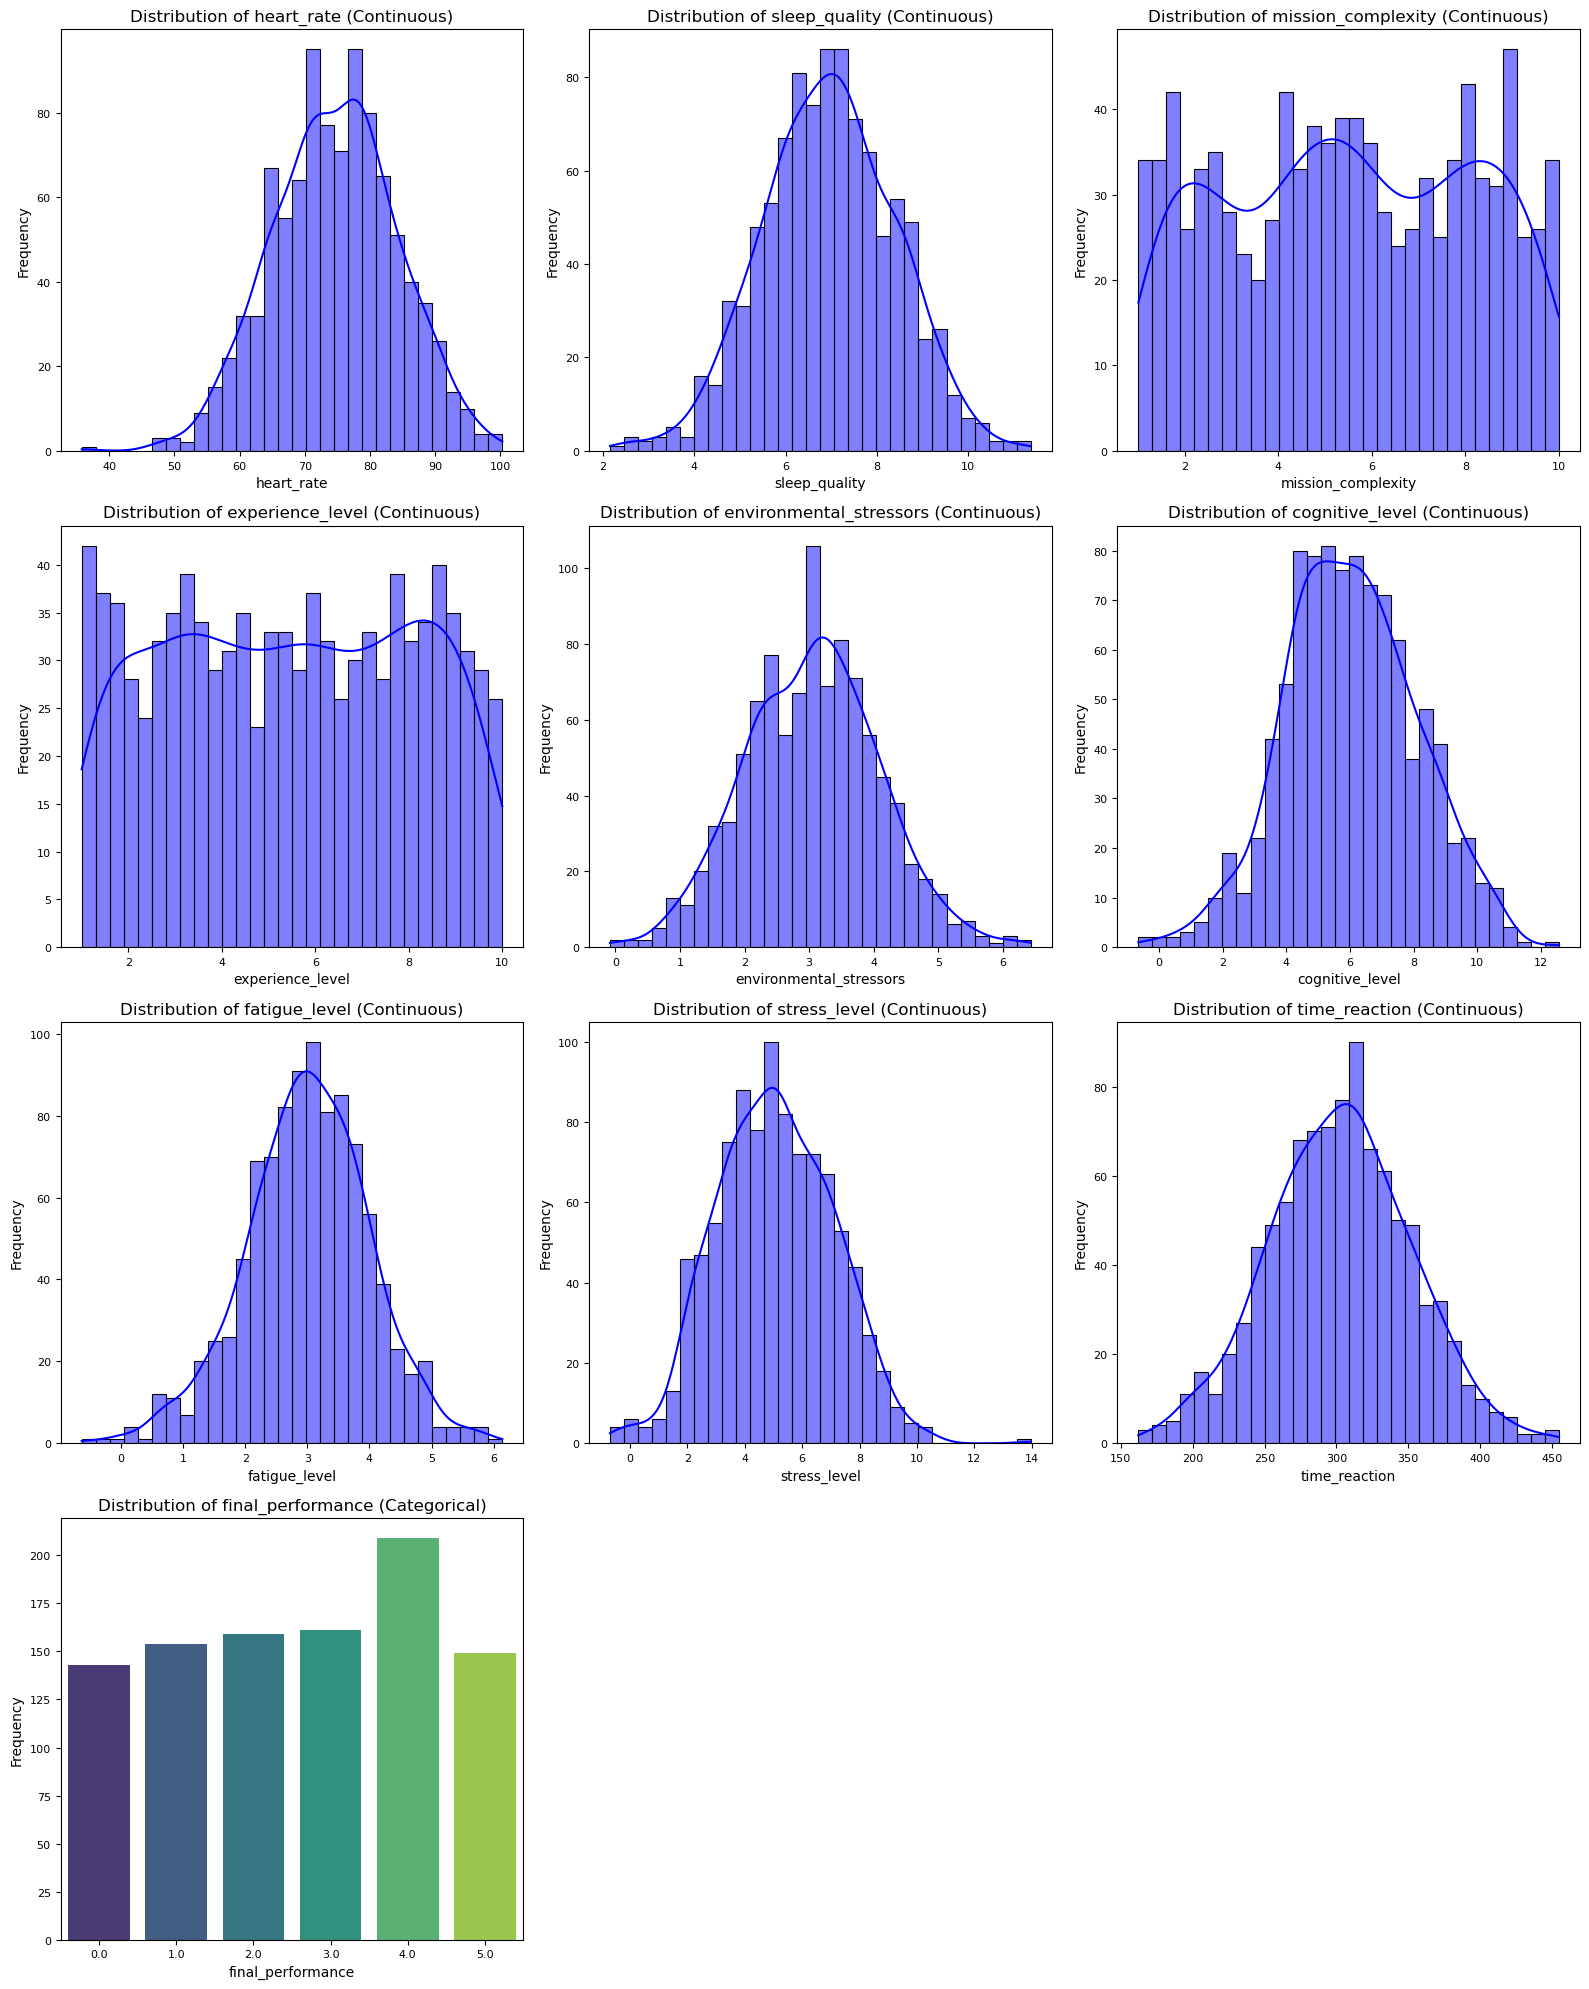

In [51]:
# Plot distribution of each variable
columns = data.columns
plt.figure(figsize=(16, 20))

for i, col in enumerate(columns, 1):
    plt.subplot((len(columns) + 2) // 3, 3, i)  # Arrange plots in a grid
    if data[col].nunique() < 20:  # Discrete/categorical
        sns.countplot(data[col], palette="viridis")
        plt.title(f'Distribution of {col} (Categorical)', fontsize=12)
    else:  # Continuous
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col} (Continuous)', fontsize=12)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [52]:
# Count missing values for each column
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values in Each Column:")
print(missing_values)

# Optionally, show the total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")


Missing Values in Each Column:
heart_rate                 7
sleep_quality              9
mission_complexity         7
experience_level           7
environmental_stressors    1
cognitive_level            6
fatigue_level              4
stress_level               3
time_reaction              4
final_performance          4
dtype: int64

Total Missing Values in Dataset: 52


In [53]:
# Drop rows where 'final_performance' is missing
data.dropna(subset=['final_performance'], inplace=True)

# Impute continuous columns with mean
continuous_columns = [
    'heart_rate', 'sleep_quality', 'mission_complexity', 'experience_level', 
    'environmental_stressors', 'cognitive_level', 'fatigue_level', 'stress_level', 'time_reaction'
]

for col in continuous_columns:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Verify that missing values are handled
# print("Missing Values After Imputation:")
# print(data.isnull().sum())

# Display the first few rows of the dataset after imputation
print(data.head())


   heart_rate  sleep_quality  mission_complexity  experience_level  \
0   73.069179       5.209936            3.542490          2.950158   
1   85.503196       4.250244            3.911206          8.444680   
2   68.889989       8.526936            4.163752          7.035220   
3   82.963400       5.055927            1.569873          9.049509   
4   74.983783       6.731979            9.873655          1.514617   

   environmental_stressors  cognitive_level  fatigue_level  stress_level  \
0                 2.816011         4.628891       2.643523      5.636319   
1                 3.505539         3.022155       3.362025      5.827296   
2                 1.991987         4.142527       3.054340      3.102756   
3                 2.230838         4.498199       3.762958      5.146209   
4                 3.510676         7.043190       1.481578      3.180736   

   time_reaction  final_performance  
0     379.196822                2.0  
1     212.188488                4.0  
2     34

c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


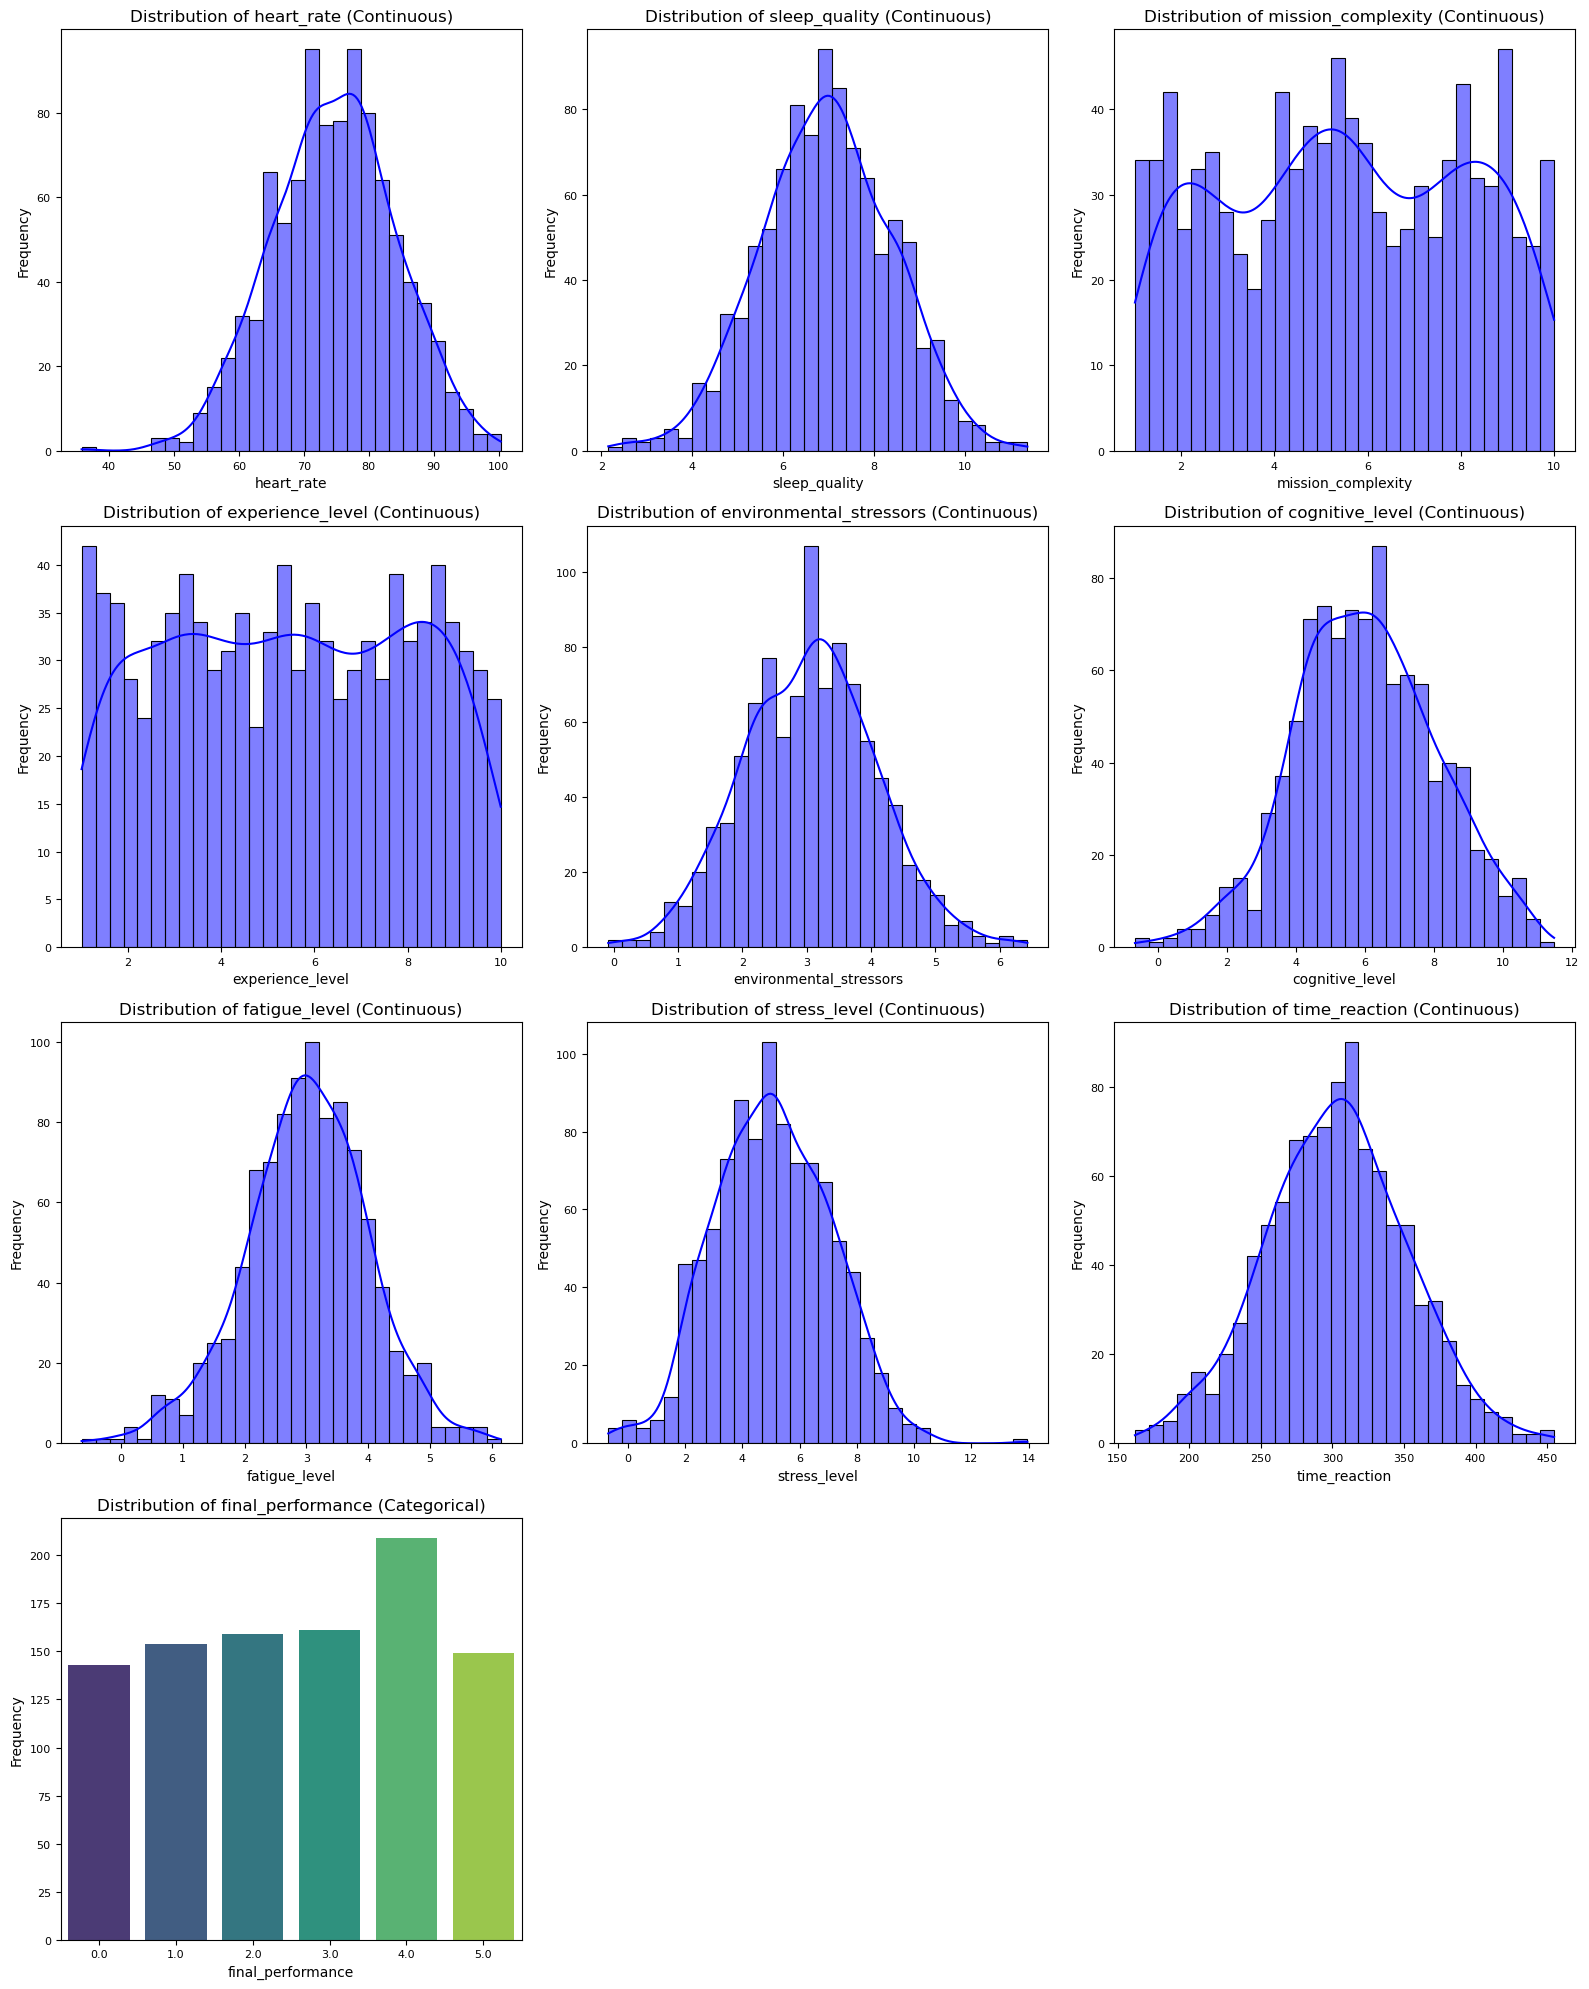

In [54]:
# Plot distribution of each variable
columns = data.columns
plt.figure(figsize=(16, 20))

for i, col in enumerate(columns, 1):
    plt.subplot((len(columns) + 2) // 3, 3, i)  # Arrange plots in a grid
    if data[col].nunique() < 20:  # Discrete/categorical
        sns.countplot(data[col], palette="viridis")
        plt.title(f'Distribution of {col} (Categorical)', fontsize=12)
    else:  # Continuous
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col} (Continuous)', fontsize=12)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\si

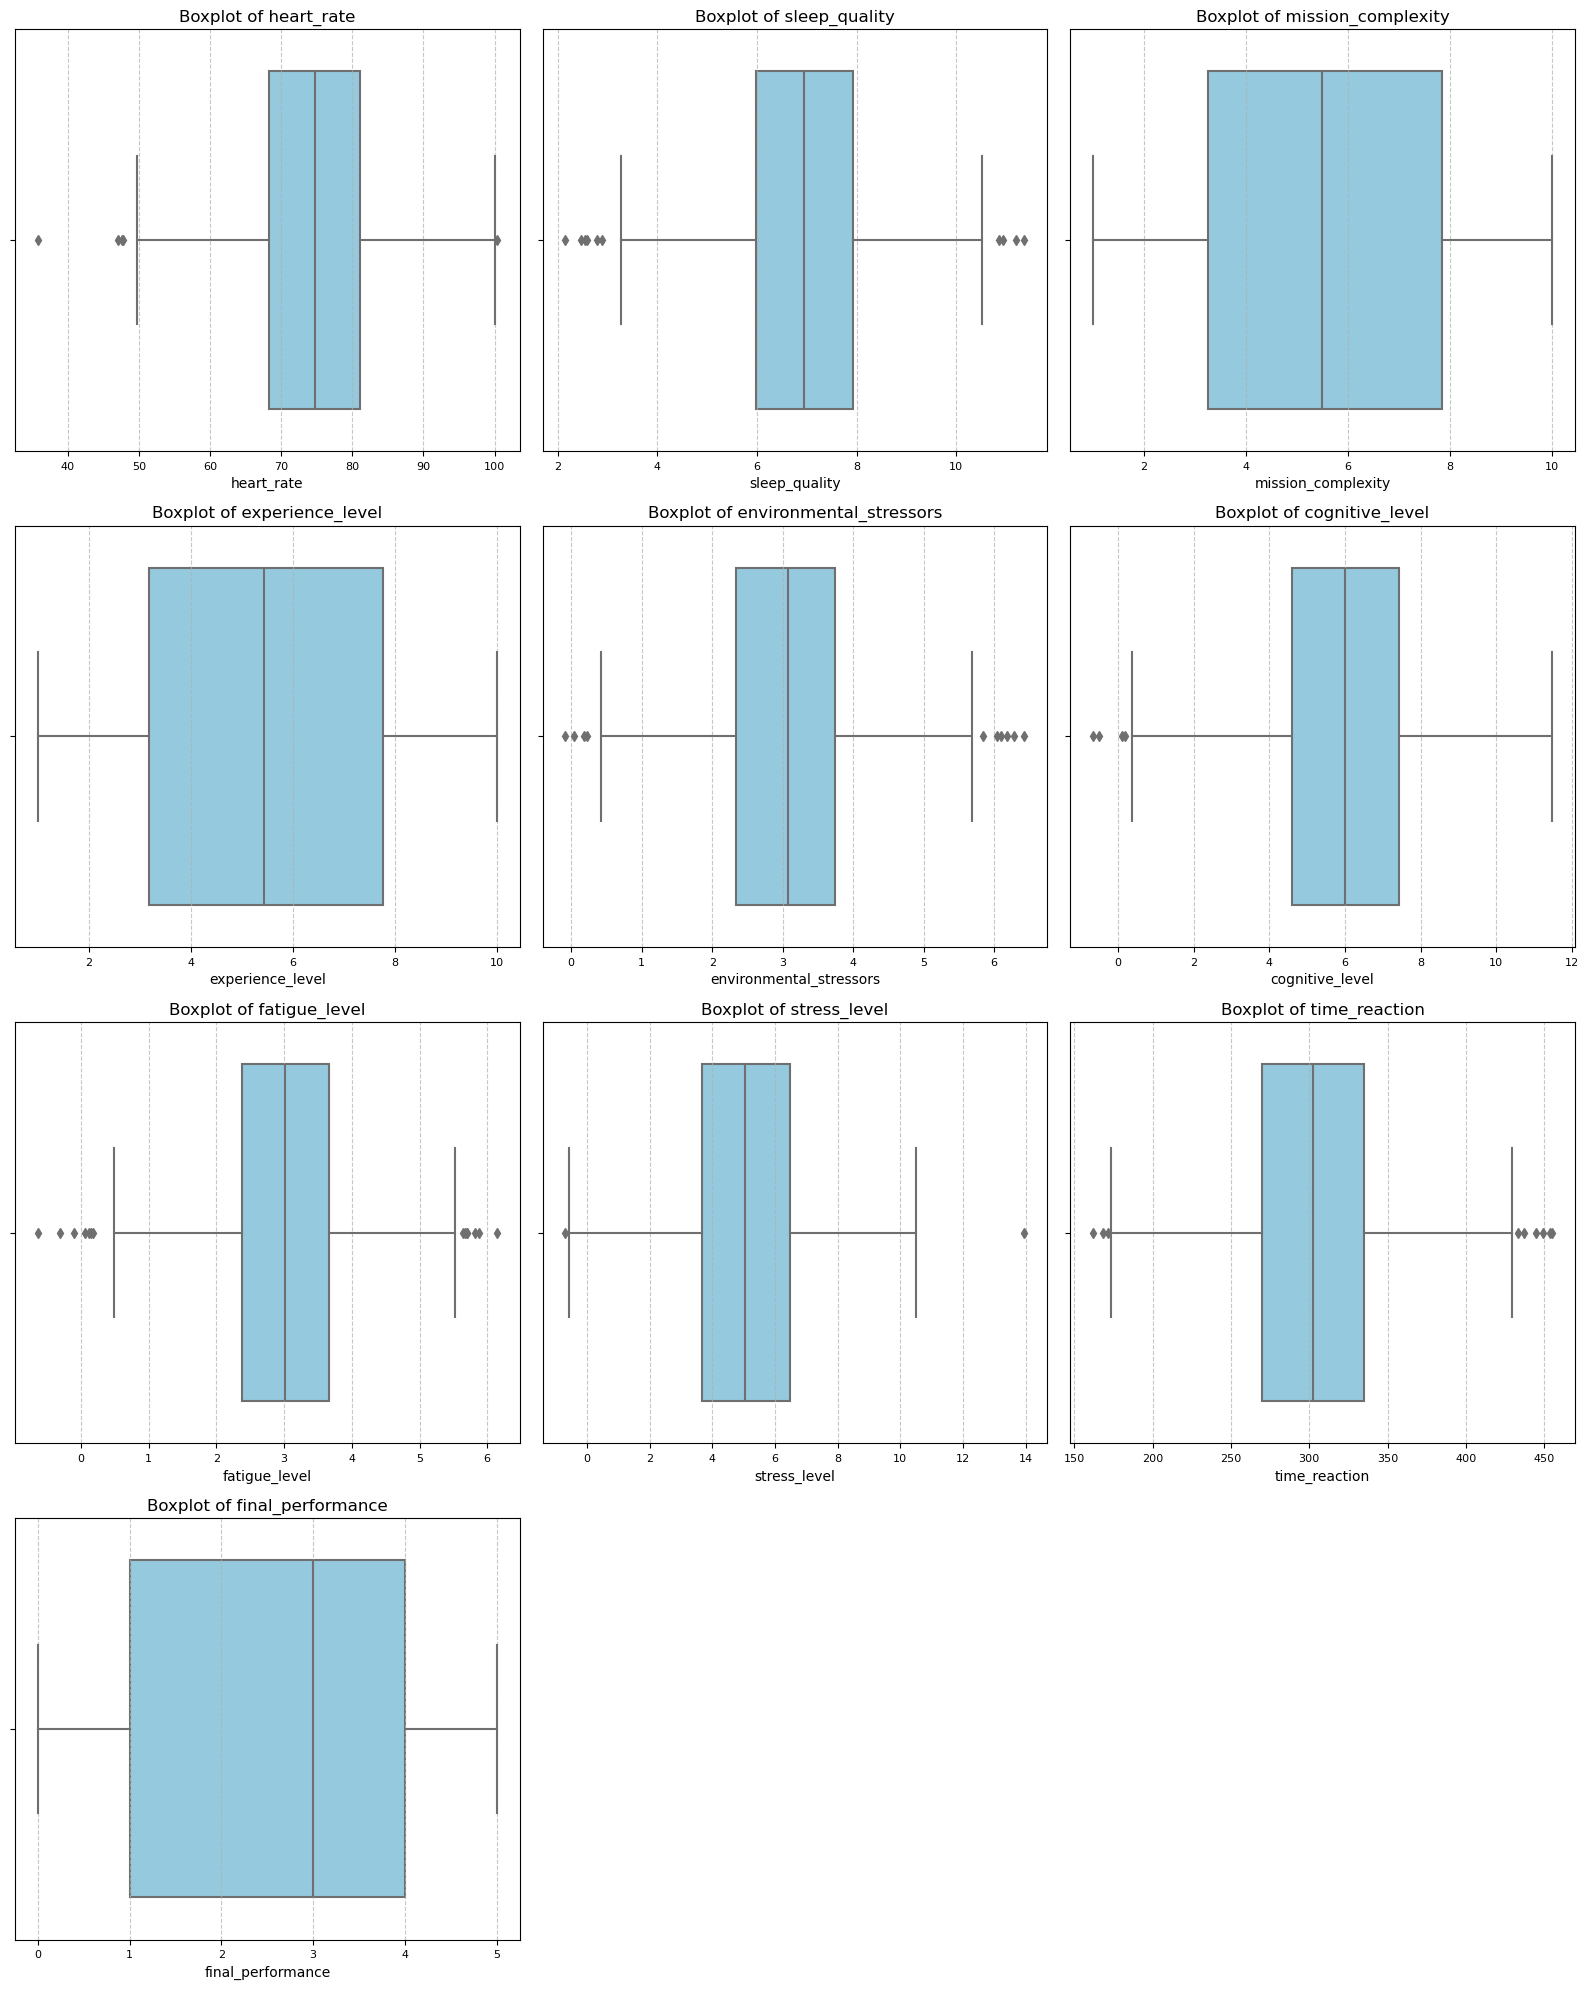

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate boxplots for each variable
plt.figure(figsize=(16, 20))

for i, col in enumerate(data.columns, 1):
    plt.subplot((len(data.columns) + 2) // 3, 3, i)  # Arrange plots in a grid
    sns.boxplot(data[col], color="skyblue", orient='h')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [56]:
# Function to find indices of outliers using the IQR method
def outlier_indices_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()

# Find outlier indices for each column
outlier_indices = {}
for col in data.columns:
    outlier_indices[col] = outlier_indices_iqr(data, col)

# Print the outlier indices for each column
for col, indices in outlier_indices.items():
    print(f"\nOutlier row indices in '{col}':")
    print(indices)



Outlier row indices in 'heart_rate':
[432, 465, 549, 626, 970]

Outlier row indices in 'sleep_quality':
[49, 80, 217, 317, 403, 440, 592, 622, 809, 932]

Outlier row indices in 'mission_complexity':
[]

Outlier row indices in 'experience_level':
[]

Outlier row indices in 'environmental_stressors':
[8, 77, 211, 464, 501, 518, 725, 731, 825, 866]

Outlier row indices in 'cognitive_level':
[214, 240, 865, 934]

Outlier row indices in 'fatigue_level':
[15, 210, 265, 280, 457, 503, 532, 568, 601, 615, 773, 837, 843, 844]

Outlier row indices in 'stress_level':
[30, 141]

Outlier row indices in 'time_reaction':
[207, 385, 424, 620, 669, 725, 885, 900, 908]

Outlier row indices in 'final_performance':
[]


In [57]:
# Function to find outlier indices using the IQR method
def outlier_indices_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index


# Initialize counter for total outliers
total_outliers = 0

# Dictionary to store columns with outliers for each class
class_outlier_columns = {class_val: set() for class_val in data['final_performance'].unique()}

# Detect outliers for each column and map them to classes
for col in data.columns:
    if col != 'final_performance':  # Exclude the target variable
        outlier_indices = outlier_indices_iqr(data, col)
        
        # Update the total outliers count
        total_outliers += len(outlier_indices)
        
        # Check which classes these outliers belong to
        for index in outlier_indices:
            class_val = data.loc[index, 'final_performance']
            class_outlier_columns[class_val].add(col)

# Display total outliers
print(f"Total number of outliers across all columns: {total_outliers}")

# Display columns with outliers for each class
for class_val, columns in class_outlier_columns.items():
    print(f"\nClass {class_val} contains outliers in columns:")
    print(columns if columns else "No outliers")


Total number of outliers across all columns: 54

Class 2.0 contains outliers in columns:
{'fatigue_level', 'environmental_stressors', 'time_reaction', 'cognitive_level', 'sleep_quality'}

Class 4.0 contains outliers in columns:
{'fatigue_level', 'stress_level', 'heart_rate', 'environmental_stressors', 'time_reaction', 'sleep_quality'}

Class 5.0 contains outliers in columns:
{'fatigue_level', 'cognitive_level', 'sleep_quality', 'environmental_stressors'}

Class 0.0 contains outliers in columns:
{'fatigue_level', 'stress_level', 'heart_rate', 'time_reaction', 'cognitive_level', 'sleep_quality'}

Class 3.0 contains outliers in columns:
{'fatigue_level', 'heart_rate', 'environmental_stressors', 'time_reaction', 'sleep_quality'}

Class 1.0 contains outliers in columns:
{'fatigue_level', 'heart_rate', 'environmental_stressors', 'time_reaction', 'cognitive_level'}


In [58]:
# Collect all outlier indices across columns
all_outlier_indices = set()
for col in data.columns:
    if col != 'final_performance':  # Exclude target variable from outlier detection
        outlier_indices = outlier_indices_iqr(data, col)
        all_outlier_indices.update(outlier_indices)

# Remove rows with outliers
cleaned_data = data.drop(index=all_outlier_indices)

# Display the shape of the original and cleaned datasets
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")


Original dataset shape: (975, 10)
Cleaned dataset shape: (922, 10)


c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\miniconda3\lib\si

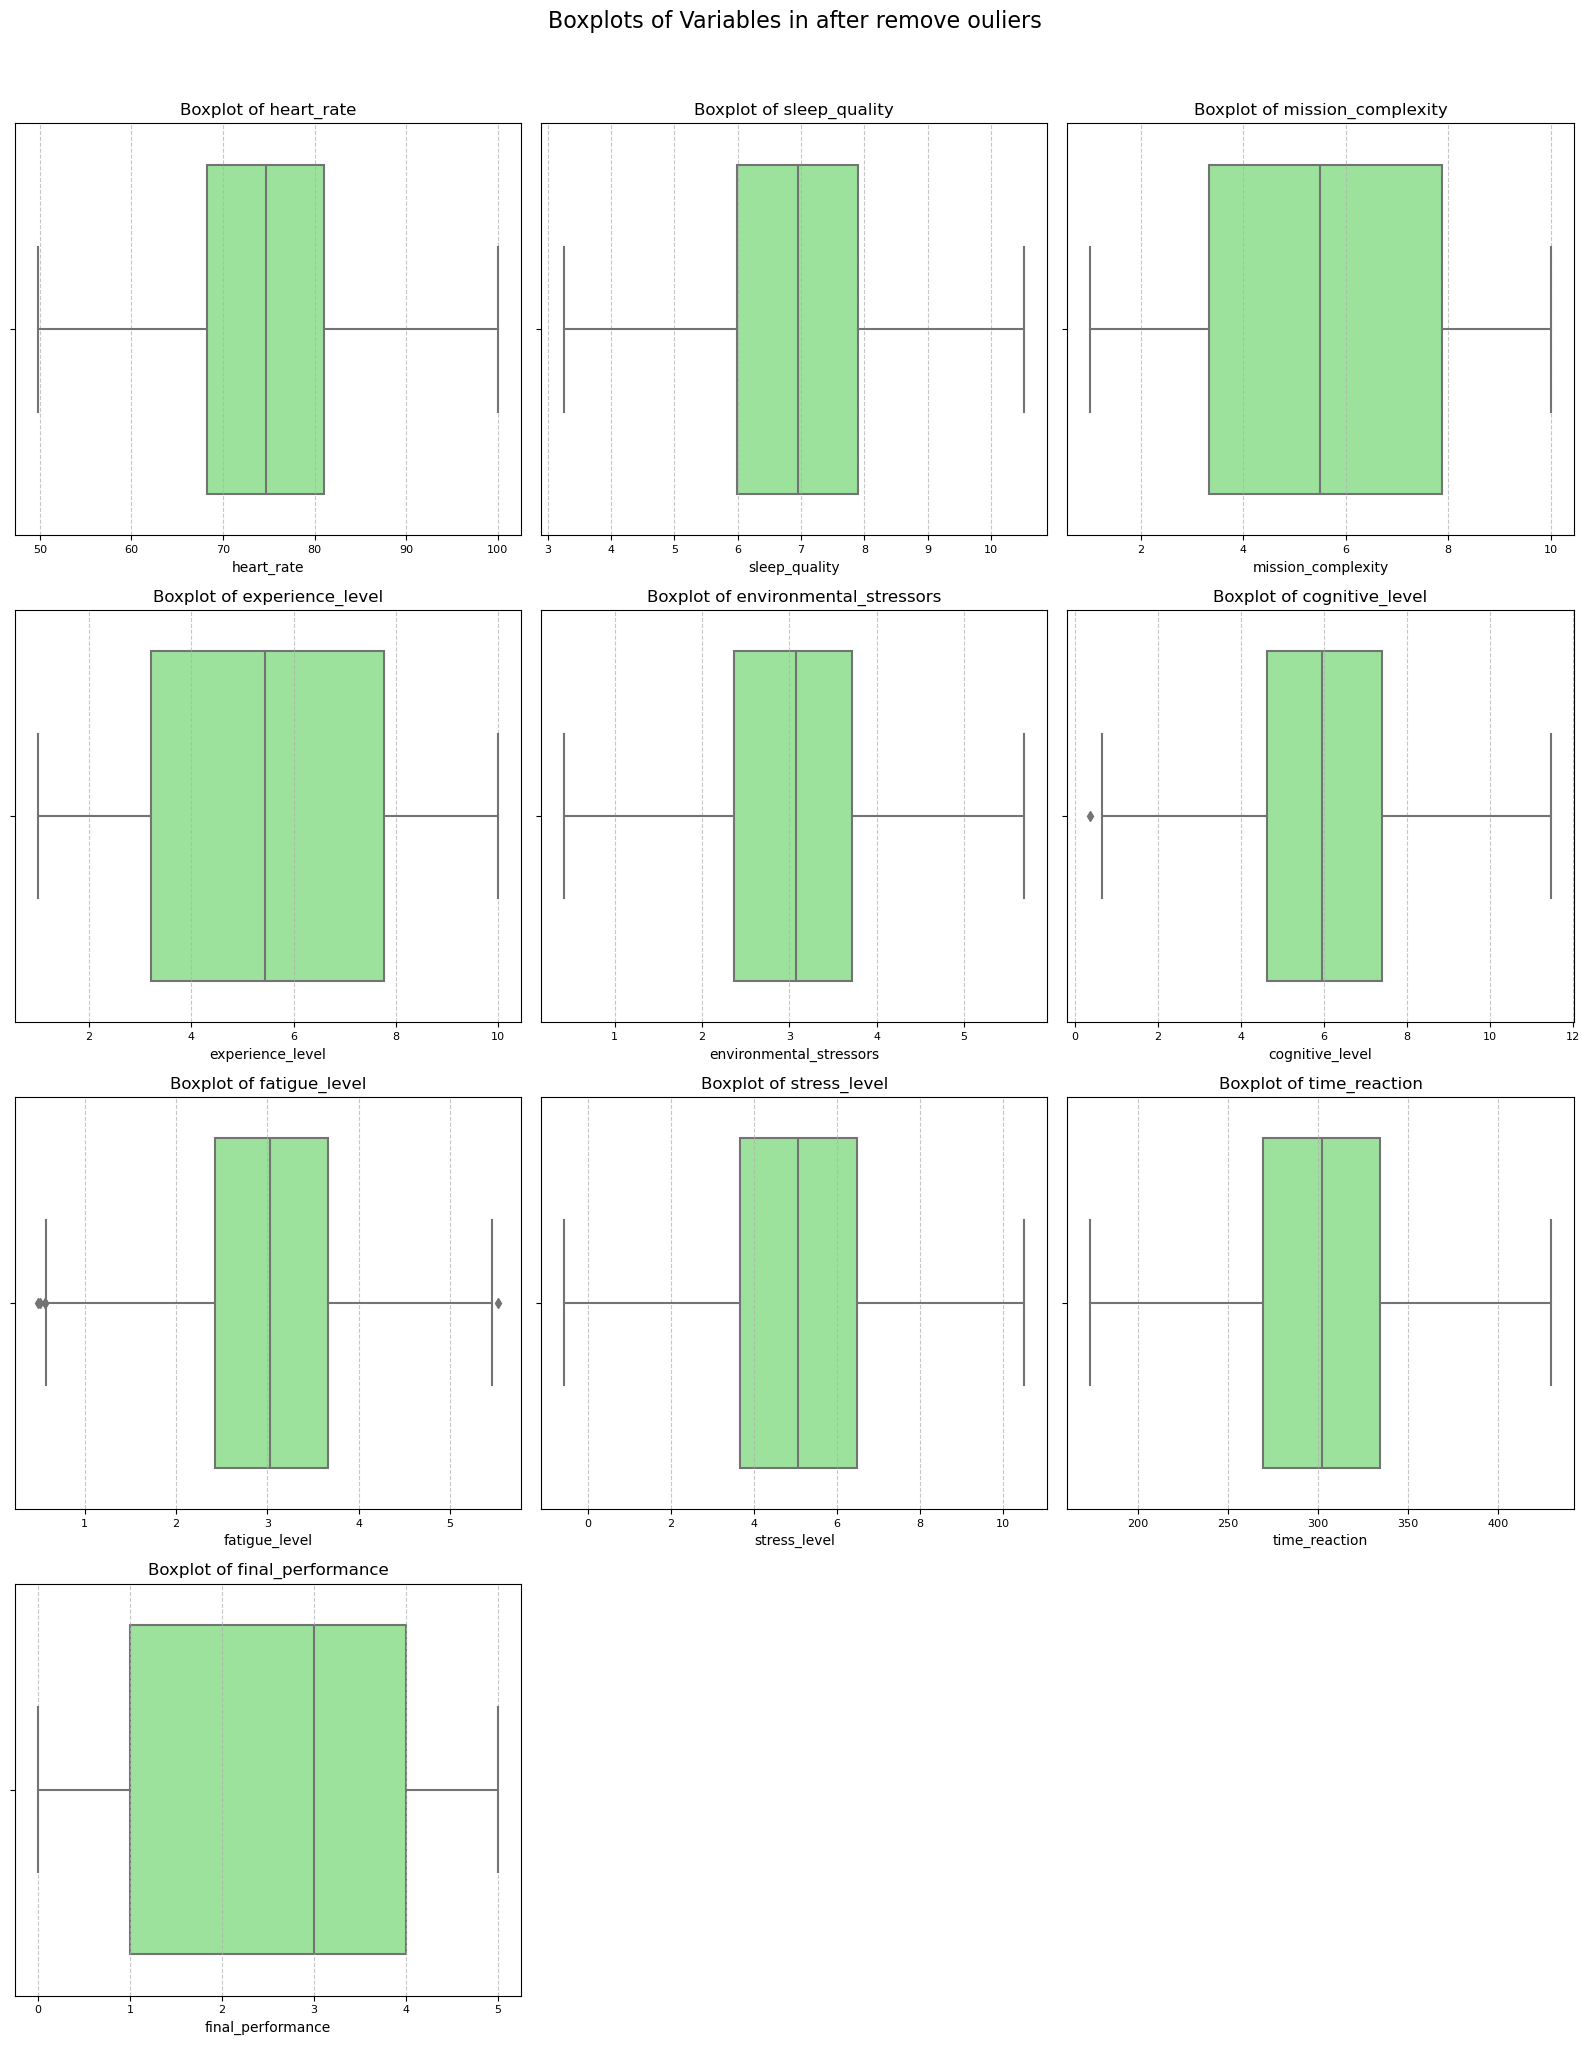

In [59]:
# Generate boxplots for the cleaned dataset
plt.figure(figsize=(16, 20))

for i, col in enumerate(cleaned_data.columns, 1):
    plt.subplot((len(cleaned_data.columns) + 2) // 3, 3, i)  # Arrange plots in a grid
    sns.boxplot(cleaned_data[col], color="lightgreen", orient='h')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a main title
plt.suptitle("Boxplots of Variables in after remove ouliers", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cleaned_data  # No add_constant function

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF for each feature
print(vif_data)

                   feature        VIF
0               heart_rate  40.688481
1            sleep_quality  22.889167
2       mission_complexity   5.489773
3         experience_level   5.282777
4  environmental_stressors   9.890761
5          cognitive_level   9.785448
6            fatigue_level  10.630445
7             stress_level   7.420258
8            time_reaction  31.716215
9        final_performance   3.419238


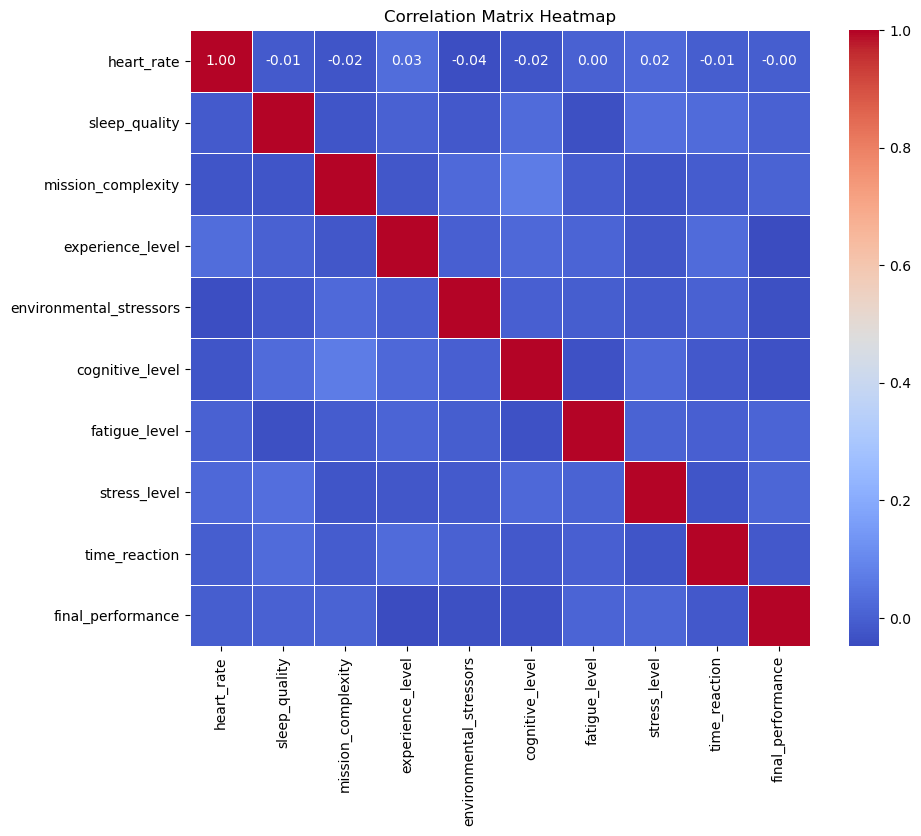

In [61]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [62]:
from sklearn.feature_selection import mutual_info_classif

# Assuming 'data' is your dataset and 'final_performance' is the target column

# Get the feature matrix (X) and the target vector (y)
X = cleaned_data.drop(columns=['final_performance'])  # Features
y = cleaned_data['final_performance']  # Target variable

# Calculate Information Gain (using Mutual Information for classification tasks)
info_gain = mutual_info_classif(X, y)

# Create a DataFrame to display the Information Gain for each feature
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

# Sort the features based on Information Gain
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the features with the highest Information Gain
print("Features ranked by Information Gain:")
print(info_gain_df)


Features ranked by Information Gain:
                   Feature  Information Gain
7             stress_level          0.031321
3         experience_level          0.031214
8            time_reaction          0.023957
5          cognitive_level          0.010630
0               heart_rate          0.008515
2       mission_complexity          0.003737
1            sleep_quality          0.000000
4  environmental_stressors          0.000000
6            fatigue_level          0.000000


In [63]:
# Use the cleaned data (data_cleaned) for Chi-Square test
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler


X = cleaned_data.drop(columns=['final_performance'])  # Correct column name
y = cleaned_data['final_performance']  # Correct column name

# Scale the feature data to be non-negative (using MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square Test for feature selection
chi2_selector = SelectKBest(chi2, k='all')  # Select all features
X_chi2 = chi2_selector.fit_transform(X_scaled, y)

# Get the Chi-Square p-values for each feature
p_values = chi2_selector.pvalues_

# Create a DataFrame to sort the features by p-values
p_values_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square p-value': p_values
})

# Sort the features by p-value (ascending order)
p_values_df_sorted = p_values_df.sort_values(by='Chi-Square p-value', ascending=False)

# Print the sorted features by their Chi-Square p-value
print("\nFeatures sorted by Chi-Square p-values (lowest to highest):\n")
print(p_values_df_sorted)

# Display the selected features based on Chi-Square test
selected_features = X.columns[chi2_selector.get_support()]
print(f"\nSelected features based on Chi-Square test: {selected_features}")


Features sorted by Chi-Square p-values (lowest to highest):

                   Feature  Chi-Square p-value
1            sleep_quality            0.999658
4  environmental_stressors            0.999553
7             stress_level            0.999309
5          cognitive_level            0.997230
0               heart_rate            0.994353
2       mission_complexity            0.990236
6            fatigue_level            0.988913
8            time_reaction            0.986532
3         experience_level            0.964245

Selected features based on Chi-Square test: Index(['heart_rate', 'sleep_quality', 'mission_complexity', 'experience_level',
       'environmental_stressors', 'cognitive_level', 'fatigue_level',
       'stress_level', 'time_reaction'],
      dtype='object')


# model developement

In [64]:
# Import required libraries
from imblearn.combine import SMOTETomek
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Feature Engineering - Create interaction features
selected_features = [
    'heart_rate', 'sleep_quality', 'mission_complexity', 'experience_level',
    'environmental_stressors'
]

# Create feature matrix X with original and interaction features
X = cleaned_data[selected_features].copy()
X['hr_stress'] = X['heart_rate'] * X['environmental_stressors']
X['experience_complexity'] = X['experience_level'] * X['mission_complexity']
X['sleep_stress'] = X['sleep_quality'] * X['environmental_stressors']
X['hr_experience'] = X['heart_rate'] * X['experience_level']
X['sleep_complexity'] = X['sleep_quality'] * X['mission_complexity']

# Target variable
y = cleaned_data['final_performance']

# Display original class distribution
print("Original class distribution:")
print(Counter(y))
print(f"Original dataset shape: {X.shape}")

# 2. Apply SMOTETomek
# Initialize SMOTETomek
smote_tomek = SMOTETomek(
    sampling_strategy='auto',  # or specify custom ratios like {0: 100, 1: 100, 2: 100}
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit and apply the resampling
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# 3. Display results
print("\nResampled class distribution:")
print(Counter(y_resampled))
print(f"Resampled dataset shape: {X_resampled.shape}")

# Calculate and display the percentage change
original_samples = len(y)
resampled_samples = len(y_resampled)
percentage_change = ((resampled_samples - original_samples) / original_samples) * 100

print(f"\nPercentage change in dataset size: {percentage_change:.2f}%")

# 4. Convert resampled data to DataFrame to maintain feature names
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# 5. Optional: Scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)

# 6. Display sample of resampled data
print("\nSample of resampled and scaled data:")
print(X_resampled_scaled.head())

# 7. Verify data integrity
print("\nData integrity check:")
print("Number of features:", X_resampled.shape[1])
print("Number of samples:", len(y_resampled))
print("Any missing values:", X_resampled.isnull().sum().sum())


Original class distribution:
Counter({4.0: 203, 3.0: 152, 2.0: 149, 1.0: 145, 5.0: 140, 0.0: 133})
Original dataset shape: (922, 10)

Resampled class distribution:
Counter({0.0: 173, 3.0: 167, 2.0: 165, 1.0: 162, 5.0: 161, 4.0: 138})
Resampled dataset shape: (966, 10)

Percentage change in dataset size: 4.77%

Sample of resampled and scaled data:
   heart_rate  sleep_quality  mission_complexity  experience_level  \
0   -0.155918      -1.346128           -0.818850         -0.951651   
1    0.926581      -1.463631           -1.615408          1.423875   
2    0.053553      -0.184865            1.737726         -1.510754   
3   -0.138507       0.881268           -1.730922          0.381323   
4   -0.372625      -0.924732           -0.496385         -1.586136   

   environmental_stressors  hr_stress  experience_complexity  sleep_stress  \
0                -0.244560  -0.273689              -0.975186     -0.839963   
1                -0.865672  -0.554074              -0.784974     -1.273802

c:\Users\USER\miniconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_dat

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define DNN model creation function
def create_dnn_model(optimizer='adam', activation='relu', neurons=32):
    model = Sequential([
        Dense(neurons, input_dim=X_resampled.shape[1], activation=activation),  # First hidden layer
        Dense(neurons // 2, activation=activation),  # Second hidden layer
        Dense(len(np.unique(y_resampled)), activation='softmax')  # Output layer
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap DNN model with KerasClassifier
dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)

# Define parameter grid for DNN model
dnn_param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'neurons': [16, 32, 64]
}

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize scalers and result container
scaler = StandardScaler()
dnn_accuracies = []

# Loop through each fold for DNN
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled, y_resampled)):
    print(f"\nFold {fold + 1}")

    # Reset index of X_resampled to ensure indices match
    X_resampled_reset = X_resampled.reset_index(drop=True)

    # Split the data into training and testing sets
    X_train, X_test = X_resampled_reset.iloc[train_index], X_resampled_reset.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the DNN model using GridSearchCV
    dnn_grid_search = GridSearchCV(estimator=dnn_model, param_grid=dnn_param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
    dnn_grid_search.fit(X_train_scaled, y_train)

    # Get the best DNN model and evaluate it
    best_dnn_model = dnn_grid_search.best_estimator_
    y_pred_dnn = best_dnn_model.predict(X_test_scaled)
    dnn_accuracy = accuracy_score(y_test, y_pred_dnn)
    print(f"DNN Accuracy for Fold {fold + 1}: {dnn_accuracy:.2f}")
    dnn_accuracies.append(dnn_accuracy)

# Calculate and display the mean accuracy for DNN
mean_dnn_accuracy = np.mean(dnn_accuracies)
print(f"\nMean DNN Accuracy across all folds: {mean_dnn_accuracy:.2f}")


Fold 1
Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\USER\AppData\Local\Temp\ipykernel_18348\511527310.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)


DNN Accuracy for Fold 1: 0.29

Fold 2
Fitting 3 folds for each of 72 candidates, totalling 216 fits
DNN Accuracy for Fold 2: 0.28

Fold 3
Fitting 3 folds for each of 72 candidates, totalling 216 fits
DNN Accuracy for Fold 3: 0.31

Fold 4
Fitting 3 folds for each of 72 candidates, totalling 216 fits
DNN Accuracy for Fold 4: 0.33

Fold 5
Fitting 3 folds for each of 72 candidates, totalling 216 fits
DNN Accuracy for Fold 5: 0.30

Mean DNN Accuracy across all folds: 0.30


In [91]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

# Initialize scalers and result container
scaler = StandardScaler()
xgb_accuracies = []

# Convert X_resampled to DataFrame to use reset_index
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Loop through each fold for XGBoost
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled_df, y_resampled)):
    print(f"\nFold {fold + 1}")

    # Reset index of X_resampled to ensure indices match
    X_resampled_reset = X_resampled_df.reset_index(drop=True)

    # Split the data into training and testing sets
    X_train, X_test = X_resampled_reset.iloc[train_index], X_resampled_reset.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the XGBoost model
    xgb_model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy for Fold {fold + 1}: {xgb_accuracy:.2f}")
    xgb_accuracies.append(xgb_accuracy)

# Calculate and display the mean accuracy for XGBoost
mean_xgb_accuracy = np.mean(xgb_accuracies)
print(f"\nMean XGBoost Accuracy across all folds: {mean_xgb_accuracy:.2f}")


Fold 1
XGBoost Accuracy for Fold 1: 0.39

Fold 2
XGBoost Accuracy for Fold 2: 0.36

Fold 3
XGBoost Accuracy for Fold 3: 0.41

Fold 4
XGBoost Accuracy for Fold 4: 0.42

Fold 5
XGBoost Accuracy for Fold 5: 0.42

Mean XGBoost Accuracy across all folds: 0.40


In [100]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import parallel_backend  # Fix for joblib issue

# Define Logistic Regression model
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

# Define parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10],                # Regularization strength
    'solver': ['lbfgs', 'newton-cg'], # Solvers to try
}

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize scalers and result container
scaler = StandardScaler()
log_reg_accuracies = []

# Loop through each fold for Logistic Regression
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled, y_resampled)):
    print(f"\nFold {fold + 1}")

    # Convert X_resampled to DataFrame to use reset_index
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    
    # Reset index of X_resampled to ensure indices match
    X_resampled_reset = X_resampled_df.reset_index(drop=True)

    # Split the data into training and testing sets
    X_train, X_test = X_resampled_reset.iloc[train_index], X_resampled_reset.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to NumPy arrays to prevent serialization issues
    X_train_scaled = np.array(X_train_scaled)
    y_train = np.array(y_train)

    # Train the Logistic Regression model using GridSearchCV
    log_reg_grid_search = GridSearchCV(
        estimator=log_reg_model, 
        param_grid=log_reg_param_grid, 
        scoring='accuracy', 
        cv=3, 
        n_jobs=1,  # Fix: Avoid multiprocessing issues
        verbose=1
    )

    # Fix: Use threading backend
    with parallel_backend('threading'):
        log_reg_grid_search.fit(X_train_scaled, y_train)

    # Get the best Logistic Regression model and evaluate it
    best_log_reg_model = log_reg_grid_search.best_estimator_
    y_pred_log_reg = best_log_reg_model.predict(X_test_scaled)
    log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
    print(f"Logistic Regression Accuracy for Fold {fold + 1}: {log_reg_accuracy:.2f}")
    log_reg_accuracies.append(log_reg_accuracy)

# Calculate and display the mean accuracy for Logistic Regression
mean_log_reg_accuracy = np.mean(log_reg_accuracies)
print(f"\nMean Logistic Regression Accuracy across all folds: {mean_log_reg_accuracy:.2f}")



Fold 1
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Accuracy for Fold 1: 0.15

Fold 2
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Accuracy for Fold 2: 0.20

Fold 3
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Accuracy for Fold 3: 0.19

Fold 4
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Accuracy for Fold 4: 0.18

Fold 5
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Accuracy for Fold 5: 0.18

Mean Logistic Regression Accuracy across all folds: 0.18
